Modello creato: ChebNet
Caricamento grafo: /home/gianuca/Scrivania/Tesi/Progetto/brain-tumor-graph-segmentation-main/brain-tumor-graph-segmentation-main/data/graphs/BraTS-GLI-01166-000/BraTS-GLI-01166-000.graph
Grafo caricato con successo: BraTS-GLI-01166-000
Numero di nodi: 2607
Numero di archi: 26070
Numero di features per nodo: 50
Utilizzo del modello pre-addestrato: CHEBNET_1739029370_best.pth


/tmp/ipykernel_141274/2902904196.py:117: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(graph_file)
/tmp/ipykernel_141274/2902904196.py:142: FutureWarning: 


--- DEBUG INFORMAZIONI DATI ---
Tipo di data.y: <class 'torch.Tensor'>
Forma di data.y: torch.Size([2607])
Tipo di dati di data.y: torch.float32
Tipo di predicted_labels: <class 'torch.Tensor'>
Forma di predicted_labels: torch.Size([2607])
Tipo di dati di predicted_labels: torch.int64
Primo elemento di data.y: 0.0
Forma del primo elemento di data.y: torch.Size([])
--------------------------------

Accuratezza sul grafo BraTS-GLI-01166-000: 1.0000
Distribuzione classi predette: [2550   16    4   37]

Configurazione GNNExplainer e generazione della spiegazione...
Spiegazione generata in 430.64 secondi
Tipo di explanation.node_mask: <class 'torch.Tensor'>
Forma di explanation.node_mask: torch.Size([2607, 50])
Primo elemento di explanation.node_mask: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])
Forma del primo e

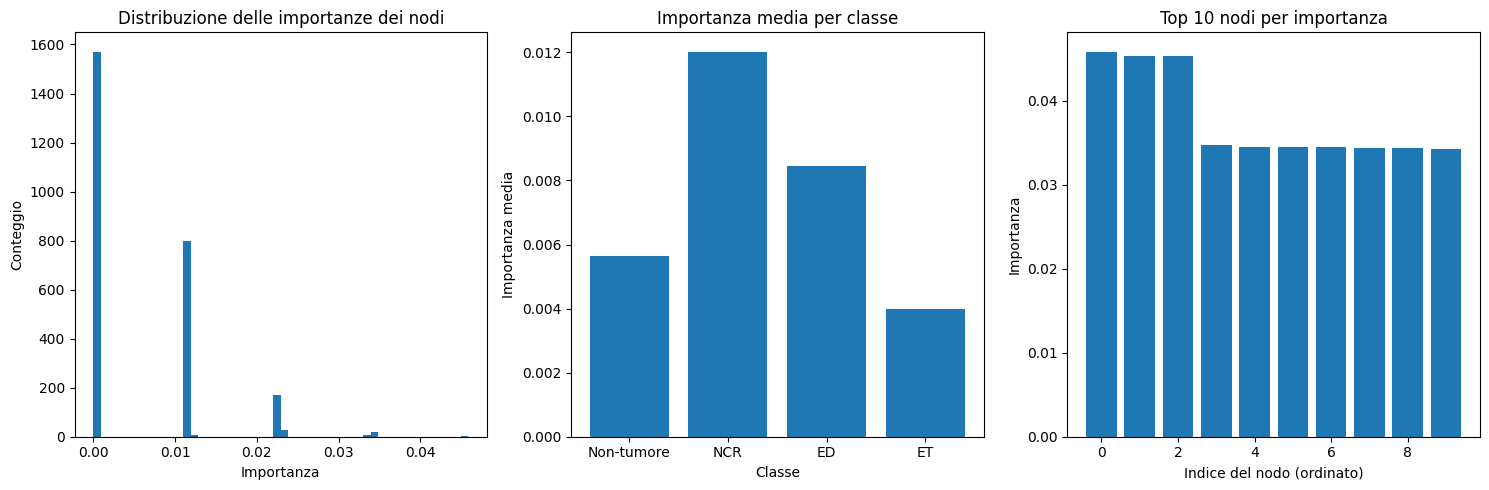


Analisi dettagliata dei nodi più importanti:
Indice    Importanza     Classe predetta
----------------------------------------
       8250.045861        Non-tumore     
      22510.045342        Non-tumore     
        250.045311        Non-tumore     
      23800.034785        Non-tumore     
       5890.034543        Non-tumore     
      18340.034513        Non-tumore     
      17780.034487        Non-tumore     
      14960.034343        Non-tumore     
      23380.034322        Non-tumore     
      25280.034320        Non-tumore     

Analisi delle feature nei nodi più importanti:
Indice feature Valore medio   
------------------------------
             202.843094
              40.952119
              30.872103
              20.816498
              10.757380


/tmp/ipykernel_141274/2902904196.py:359: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(class_importance_distributions, labels=class_labels)


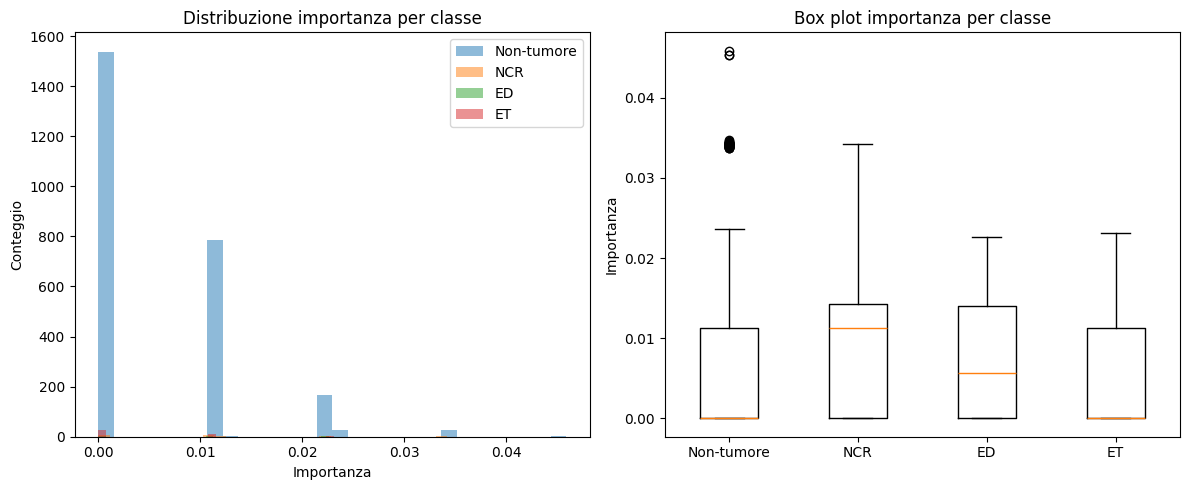


PGExplainer non è compatibile con questa configurazione, lo saltiamo.

Implementazione di GradCAM (versione custom)...
GradCAM completato in 1.98 secondi


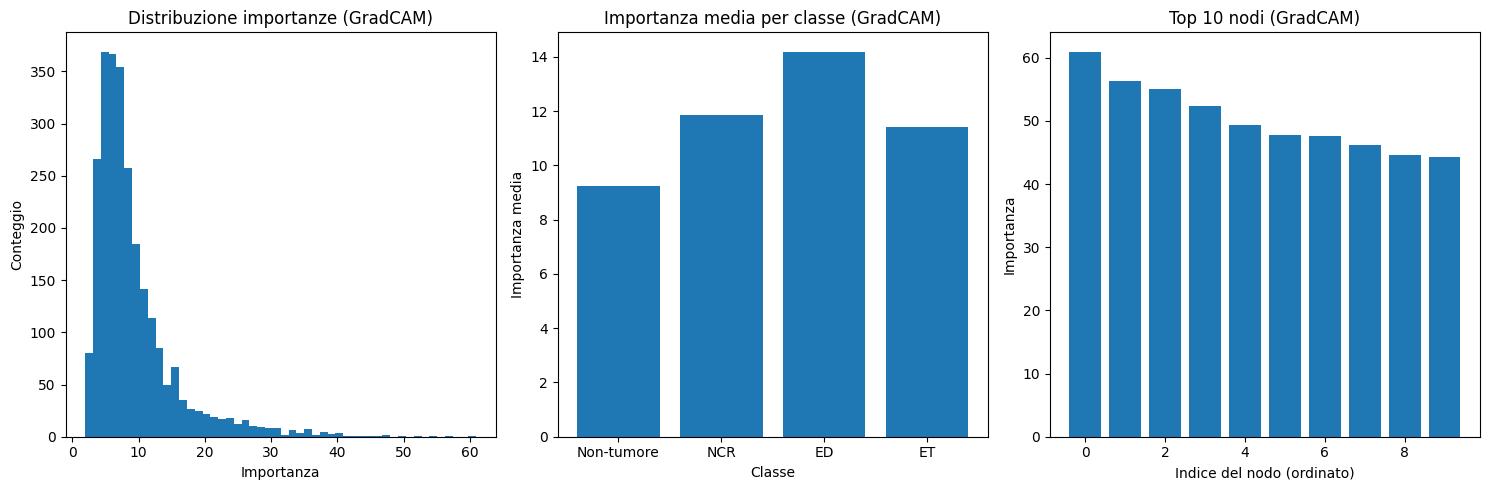


Confronto tra GNNExplainer e GradCAM:


/tmp/ipykernel_141274/2902904196.py:460: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['GNNExplainer', 'GradCAM'])


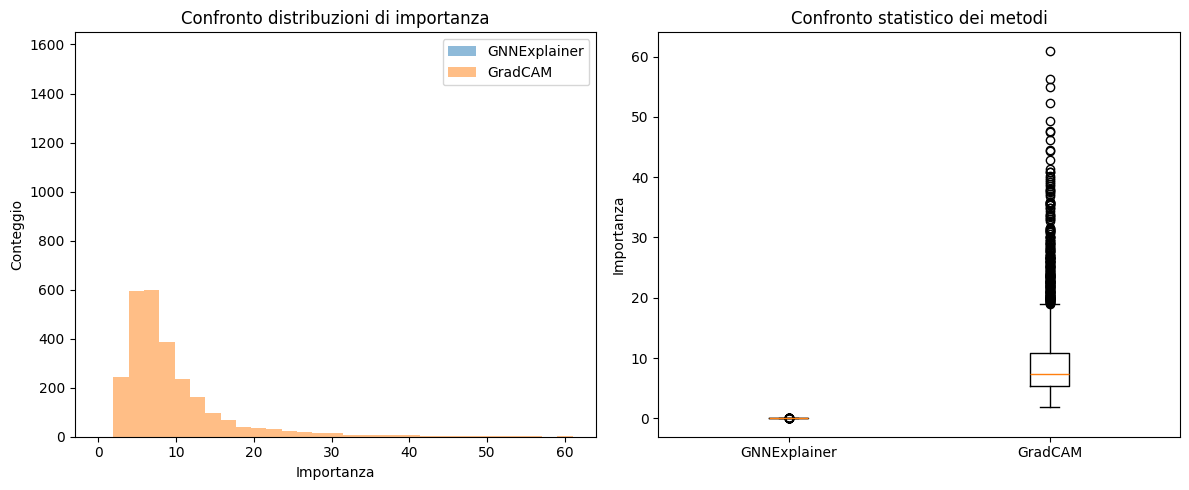


Sovrapposizione tra i top nodi identificati dai diversi metodi:
Sovrapposizione GNNExplainer-GradCAM: 0 nodi (0.0%)

Analisi per classe dei nodi top identificati da ciascun metodo:

GNNExplainer:
  Non-tumore: 47 nodi (94.0%)
  NCR: 2 nodi (4.0%)
  ED: 0 nodi (0.0%)
  ET: 1 nodi (2.0%)

GradCAM:
  Non-tumore: 49 nodi (98.0%)
  NCR: 0 nodi (0.0%)
  ED: 0 nodi (0.0%)
  ET: 1 nodi (2.0%)

Conclusioni:
Questo notebook ha dimostrato l'applicazione di diverse tecniche di explainability per GNN
nella segmentazione dei tumori cerebrali. I risultati mostrano:
1. Differenze significative tra i diversi metodi di explainability
2. Diversi livelli di importanza attribuiti alle varie classi di tessuto
3. Identificazione di nodi chiave che influenzano maggiormente le predizioni del modello

Questi risultati sottolineano l'importanza dell'utilizzo di tecniche di explainability
per comprendere le decisioni dei modelli GNN nella segmentazione dei tumori cerebrali.


In [1]:
"""
# Explainability delle GNN nella segmentazione dei tumori cerebrali

Questo notebook implementa e analizza vari metodi di explainability per modelli GNN applicati alla segmentazione dei tumori cerebrali.
I metodi implementati includono GNNExplainer e GradCAM.
"""

# Importazione delle librerie necessarie
import os
import sys
import random
from sys import platform

# Impostazione dei percorsi
_base_path = '\\'.join(os.getcwd().split('\\')[:-1]) + '\\' if platform == 'win32' else '/'.join(os.getcwd().split('/')[:-1]) + '/'
sys.path.append(_base_path)

# Importare le librerie necessarie
from monai.utils import set_determinism
from src.helpers.config import get_config
from src.models.gnn import GraphSAGE, GAT, ChebNet
from torch_geometric.explain import Explainer, ModelConfig, ThresholdConfig
# Rimuoviamo PGExplainer e usiamo solo GNNExplainer
from torch_geometric.explain.algorithm import GNNExplainer
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

# Definizione dei percorsi
_config = get_config()
data_path = os.path.join(_base_path, _config.get('DATA_FOLDER'))
graph_path = os.path.join(data_path, _config.get('GRAPH_FOLDER'))
saved_path = os.path.join(_base_path, _config.get('SAVED_FOLDER'))
reports_path = os.path.join(_base_path, _config.get('REPORT_FOLDER'))
logs_path = os.path.join(_base_path, _config.get('LOG_FOLDER'))

if platform == 'win32':
    data_path = data_path.replace('/', '\\')
    graph_path = graph_path.replace('/', '\\')
    saved_path = saved_path.replace('/', '\\')
    reports_path = reports_path.replace('/', '\\')
    logs_path = logs_path.replace('/', '\\')

# Impostare un seed per la riproducibilità
set_determinism(seed=3)
random.seed(3)
np.random.seed(3)
torch.manual_seed(3)

# Definizione dei parametri del modello
# PARAMETRI CONDIVISI
num_node_features = 50          # Dimensione feature di input
num_classes = 4                 # Numero di classi di output
lr = 1e-4                       # Learning rate per l'ottimizzatore
weight_decay = 1e-5             # Weight decay per l'ottimizzatore
dropout = .0                    # Probabilità di dropout (per features)
hidden_channels = [512, 512, 512, 512, 512, 512, 512]  # Unità nascoste

# PARAMETRI GRAPHSAGE
aggr = 'mean'                   # Operazione di aggregazione

# PARAMETRI GAT
heads = 14                      # Numero di attention heads
attention_dropout = .1          # Probabilità di dropout (per attention)

# PARAMETRI CHEBNET
k = 4                           # Ordine polinomiale Chebyshev

# Creazione del modello da utilizzare
model = ChebNet(
    in_channels=num_node_features,
    hidden_channels=hidden_channels,
    out_channels=num_classes,
    dropout=dropout,
    K=k
)
print(f"Modello creato: {model.__class__.__name__}")

# Funzione per trovare e caricare un grafo per l'analisi
def find_and_load_graph(subject_id=None):
    """
    Trova e carica un grafo per l'analisi.
    
    Args:
        subject_id: ID specifico del soggetto da caricare, se None ne verrà scelto uno casualmente
        
    Returns:
        data: Il grafo caricato
        subject_id: L'ID del soggetto caricato
    """
    if subject_id is None:
        # Trova le cartelle dei soggetti che contengono grafi
        subject_dirs = [d for d in os.listdir(graph_path) if os.path.isdir(os.path.join(graph_path, d))]
        valid_subjects = []
        
        # Cerca i primi 10 soggetti che hanno file .graph
        for subject in subject_dirs[:100]:  # Limita la ricerca per efficienza
            graph_file = os.path.join(graph_path, subject, f"{subject}.graph")
            if os.path.isfile(graph_file):
                valid_subjects.append(subject)
                if len(valid_subjects) >= 10:
                    break
        
        if not valid_subjects:
            raise FileNotFoundError("Nessun grafo trovato nella directory data/graphs/")
        
        # Scegli un soggetto casuale
        subject_id = random.choice(valid_subjects)
    
    # Carica il grafo
    graph_file = os.path.join(graph_path, subject_id, f"{subject_id}.graph")
    if not os.path.isfile(graph_file):
        raise FileNotFoundError(f"File grafo non trovato per il soggetto {subject_id}")
    
    print(f"Caricamento grafo: {graph_file}")
    data = torch.load(graph_file)
    
    return data, subject_id

# Carica un grafo specifico con alta accuratezza (come visto nel precedente test)
subject_id = "BraTS-GLI-01166-000"  # Grafo con accuratezza 100%
try:
    data, subject_id = find_and_load_graph(subject_id)
    print(f"Grafo caricato con successo: {subject_id}")
    print(f"Numero di nodi: {data.x.shape[0]}")
    print(f"Numero di archi: {data.edge_index.shape[1]}")
    print(f"Numero di features per nodo: {data.x.shape[1]}")
except FileNotFoundError as e:
    print(f"Errore: {e}")
    print("Tentativo di caricamento di un grafo alternativo...")
    data, subject_id = find_and_load_graph(None)
    print(f"Grafo alternativo caricato: {subject_id}")

# Carica il modello pre-addestrato
model_files = [f for f in os.listdir(saved_path) if 'CHEBNET' in f and f.endswith('_best.pth')]
if not model_files:
    raise FileNotFoundError("Nessun modello ChebNet pre-addestrato trovato nella directory saved/")

latest_model = model_files[-1]
print(f"Utilizzo del modello pre-addestrato: {latest_model}")
model.load_state_dict(torch.load(os.path.join(saved_path, latest_model), map_location=torch.device('cpu')))
model.eval()

# Verifica dell'accuratezza sul grafo caricato
with torch.no_grad():
    outputs = model(data.x, data.edge_index.type(torch.int64))
    predicted_labels = outputs.argmax(dim=1)
    
    # Visualizza le informazioni per debug
    print("\n--- DEBUG INFORMAZIONI DATI ---")
    print(f"Tipo di data.y: {type(data.y)}")
    if hasattr(data.y, 'shape'):
        print(f"Forma di data.y: {data.y.shape}")
    if hasattr(data.y, 'dtype'):
        print(f"Tipo di dati di data.y: {data.y.dtype}")
    print(f"Tipo di predicted_labels: {type(predicted_labels)}")
    print(f"Forma di predicted_labels: {predicted_labels.shape}")
    print(f"Tipo di dati di predicted_labels: {predicted_labels.dtype}")
    
    try:
        # Prova a estrarre il primo elemento di data.y per vedere se funziona
        if len(data.y) > 0:
            first_y = data.y[0]
            print(f"Primo elemento di data.y: {first_y}")
            if hasattr(first_y, 'shape'):
                print(f"Forma del primo elemento di data.y: {first_y.shape}")
    except Exception as e:
        print(f"Errore nell'accesso a data.y: {e}")
    
    print("--------------------------------\n")
    
    # Crea un tensore delle classi da usare, contenente le predizioni del modello
    node_classes = predicted_labels.clone()
    
    # Calcola l'accuratezza usando predicted_labels e data.y se possibile
    try:
        accuracy = (predicted_labels == data.y).float().mean().item()
        print(f"Accuratezza sul grafo {subject_id}: {accuracy:.4f}")
    except Exception as e:
        print(f"Impossibile calcolare l'accuratezza usando data.y: {e}")
        print("Usando solo le predizioni per l'analisi")
    
    class_counts = torch.bincount(predicted_labels, minlength=num_classes)
    print(f"Distribuzione classi predette: {class_counts.numpy()}")

# Configurazione GNNExplainer per la spiegabilità
print("\nConfigurazione GNNExplainer e generazione della spiegazione...")
start_time = time.time()

model_config = ModelConfig(
    mode="multiclass_classification",
    task_level="node",
    return_type="log_probs",
)

gnn_explainer = GNNExplainer(epochs=200, lr=1e-4)
explainer = Explainer(
    model=model,
    algorithm=gnn_explainer,
    explanation_type="model",
    model_config=model_config,
    node_mask_type="attributes",
    edge_mask_type=None,
    threshold_config=ThresholdConfig(threshold_type="topk", value=int(0.5 * data.x.shape[0]))
)

# Genera la spiegazione
explanation = explainer(
    x=data.x,
    edge_index=data.edge_index.type(torch.int64)
)

print(f"Spiegazione generata in {time.time() - start_time:.2f} secondi")

# DEBUG: Stampa informazioni sul node_mask
print(f"Tipo di explanation.node_mask: {type(explanation.node_mask)}")
print(f"Forma di explanation.node_mask: {explanation.node_mask.shape}")
if explanation.node_mask.numel() > 0:
    print(f"Primo elemento di explanation.node_mask: {explanation.node_mask[0]}")
    print(f"Forma del primo elemento: {explanation.node_mask[0].shape if hasattr(explanation.node_mask[0], 'shape') else 'scalar'}")

# Funzione per estrarre valori scalari in sicurezza
def safe_scalar_value(tensor):
    """Estrae in modo sicuro un valore scalare da un tensore."""
    if isinstance(tensor, (int, float)):
        return float(tensor)
    if hasattr(tensor, 'item'):
        if tensor.numel() == 1:
            return tensor.item()
        else:
            return float(tensor.mean().item())
    if isinstance(tensor, np.ndarray):
        if tensor.size == 1:
            return float(tensor.item())
        else:
            return float(tensor.mean())
    return float(tensor)  # Tenta una conversione diretta

# Visualizzazione dei risultati delle spiegazioni
print("\nVisualizzazione dei risultati delle spiegazioni...")

# Estrai i valori di importanza dei nodi in modo sicuro
node_importances = []
for i in range(len(explanation.node_mask)):
    node_importances.append(safe_scalar_value(explanation.node_mask[i]))
node_importances = np.array(node_importances)

# 1. Visualizza la distribuzione dei punteggi di importanza dei nodi
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(node_importances, bins=50)
plt.title('Distribuzione delle importanze dei nodi')
plt.xlabel('Importanza')
plt.ylabel('Conteggio')

# 2. Visualizza l'importanza media per classe
classes = ["Non-tumore", "NCR", "ED", "ET"]
class_importances = []
for i in range(len(classes)):
    # Converti il tensore PyTorch in array NumPy
    node_classes_np = node_classes.cpu().numpy()
    mask = (node_classes_np == i)
    if np.any(mask):
        # Estrai le importanze per questa classe
        class_node_importances = [node_importances[j] for j in range(len(mask)) if mask[j]]
        class_importances.append(np.mean(class_node_importances) if class_node_importances else 0)
    else:
        class_importances.append(0)

plt.subplot(1, 3, 2)
plt.bar(classes, class_importances)
plt.title('Importanza media per classe')
plt.xlabel('Classe')
plt.ylabel('Importanza media')

# 3. Visualizza i top nodi più importanti
top_n = 10  # Numero di nodi top da visualizzare

# Trova gli indici dei top_n nodi - corretti per evitare stride negativi
sorted_indices = np.flip(np.argsort(node_importances))  # Usa flip invece di [::-1]
top_n_indices = sorted_indices[:top_n]
top_n_importances = [node_importances[i] for i in top_n_indices]

plt.subplot(1, 3, 3)
plt.bar(range(top_n), top_n_importances)
plt.title(f'Top {top_n} nodi per importanza')
plt.xlabel('Indice del nodo (ordinato)')
plt.ylabel('Importanza')
plt.tight_layout()
plt.show()

# Analisi dettagliata dei top nodi
print("\nAnalisi dettagliata dei nodi più importanti:")
print(f"{'Indice':10}{'Importanza':15}{'Classe predetta':15}")
print("-" * 40)
for i, idx in enumerate(top_n_indices):
    node_importance = node_importances[idx]
    try:
        # Converti l'indice in intero e accedi al tensore
        class_idx = node_classes[int(idx)].item()
        pred_class = classes[class_idx]
        print(f"{int(idx):10}{node_importance:.6f}{'':8}{pred_class:15}")
    except Exception as e:
        print(f"{int(idx):10}{node_importance:.6f}{'':8}ERRORE: {e}")

# Analisi delle feature più importanti per i top nodi
if hasattr(explanation, 'feature_importance') and explanation.feature_importance is not None:
    # Se l'explainer ha calcolato l'importanza delle feature
    # Estrai i valori di importanza delle feature in modo sicuro
    feature_importances = []
    for i in range(explanation.feature_importance.shape[1]):
        feature_importances.append(safe_scalar_value(explanation.feature_importance[:, i]))
    feature_importances = np.array(feature_importances)
    
    top_features = np.flip(np.argsort(feature_importances))[:5]
    
    print("\nAnalisi delle feature più importanti:")
    print(f"{'Indice feature':15}{'Importanza':15}")
    print("-" * 30)
    for idx in top_features:
        print(f"{idx:15}{feature_importances[idx]:.6f}")
else:
    # Alternativa: analizza le feature nei nodi più importanti
    print("\nAnalisi delle feature nei nodi più importanti:")
    # Converti l'array NumPy in lista o tensore PyTorch per l'indicizzazione
    top_n_indices_list = [int(i) for i in top_n_indices]
    top_node_features = data.x[top_n_indices_list]
    mean_features = torch.mean(top_node_features, dim=0).cpu().numpy()
    top_mean_features = np.flip(np.argsort(mean_features))[:5]
    
    print(f"{'Indice feature':15}{'Valore medio':15}")
    print("-" * 30)
    for idx in top_mean_features:
        print(f"{idx:15}{mean_features[idx]:.6f}")

# Confronto tra classi per importanza - usando importanze già estratte
plt.figure(figsize=(12, 5))

# Converti node_classes in numpy una volta sola
node_classes_np = node_classes.cpu().numpy()

# Raccogliamo le importanze per ogni classe
class_importance_distributions = []
class_labels = []
for i, class_name in enumerate(classes):
    class_mask = (node_classes_np == i)
    if np.any(class_mask):
        class_importances = [node_importances[j] for j in range(len(class_mask)) if class_mask[j]]
        class_importance_distributions.append(class_importances)
        class_labels.append(class_name)
        
        plt.subplot(1, 2, 1)
        plt.hist(class_importances, bins=30, alpha=0.5, label=class_name)

# Box plot per confronto più chiaro
plt.subplot(1, 2, 2)
if class_importance_distributions:  # Assicurati che ci sia almeno una distribuzione
    plt.boxplot(class_importance_distributions, labels=class_labels)

plt.subplot(1, 2, 1)
plt.title('Distribuzione importanza per classe')
plt.xlabel('Importanza')
plt.ylabel('Conteggio')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Box plot importanza per classe')
plt.ylabel('Importanza')

plt.tight_layout()
plt.show()

# Saltiamo PGExplainer poiché non è compatibile
print("\nPGExplainer non è compatibile con questa configurazione, lo saltiamo.")

# Creiamo dati fittizi per PGExplainer per mantenere la compatibilità con il resto del codice
pg_node_importances = np.zeros_like(node_importances)
top_pg = set(range(min(50, len(node_importances))))

# Implementazione di GradCAM 
print("\nImplementazione di GradCAM (versione custom)...")
start_time = time.time()

# Implementazione semplificata di GradCAM
x_grad = data.x.clone().detach().requires_grad_(True)
with torch.enable_grad():
    outputs = model(x_grad, data.edge_index.type(torch.int64))
    model.zero_grad()
    target_class = outputs.argmax(dim=1)
    # Usa gather per selezionare la classe predetta per ogni nodo
    loss = outputs.gather(1, target_class.unsqueeze(1)).sum()
    loss.backward()
    
    # Calcola l'importanza per ogni nodo come media del gradiente
    gradcam_importances = []
    for i in range(len(x_grad)):
        grad_value = x_grad.grad[i].abs().mean().item()
        gradcam_importances.append(grad_value)
    gradcam_importances = np.array(gradcam_importances)

print(f"GradCAM completato in {time.time() - start_time:.2f} secondi")

# Visualizza GradCAM
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(gradcam_importances, bins=50)
plt.title('Distribuzione importanze (GradCAM)')
plt.xlabel('Importanza')
plt.ylabel('Conteggio')

# Importanza media per classe con GradCAM
gradcam_class_importances = []
for i in range(len(classes)):
    mask = (node_classes_np == i)  # Usa l'array numpy già convertito prima
    if np.any(mask):
        class_importances = [gradcam_importances[j] for j in range(len(mask)) if mask[j]]
        gradcam_class_importances.append(np.mean(class_importances) if class_importances else 0)
    else:
        gradcam_class_importances.append(0)

plt.subplot(1, 3, 2)
plt.bar(classes, gradcam_class_importances)
plt.title('Importanza media per classe (GradCAM)')
plt.xlabel('Classe')
plt.ylabel('Importanza media')

# Top nodi secondo GradCAM
top_gradcam_indices = np.flip(np.argsort(gradcam_importances))[:top_n]
top_gradcam_importances = [gradcam_importances[i] for i in top_gradcam_indices]

plt.subplot(1, 3, 3)
plt.bar(range(top_n), top_gradcam_importances)
plt.title(f'Top {top_n} nodi (GradCAM)')
plt.xlabel('Indice del nodo (ordinato)')
plt.ylabel('Importanza')
plt.tight_layout()
plt.show()

# Confronto tra i metodi disponibili (GNNExplainer e GradCAM)
print("\nConfronto tra GNNExplainer e GradCAM:")

plt.figure(figsize=(12, 5))

# Confronto distribuzioni
plt.subplot(1, 2, 1)
plt.hist(node_importances, bins=30, alpha=0.5, label='GNNExplainer')
plt.hist(gradcam_importances, bins=30, alpha=0.5, label='GradCAM')
plt.title('Confronto distribuzioni di importanza')
plt.xlabel('Importanza')
plt.ylabel('Conteggio')
plt.legend()

# Boxplot comparativo
plt.subplot(1, 2, 2)
data_to_plot = [
    node_importances,
    gradcam_importances
]
plt.boxplot(data_to_plot, labels=['GNNExplainer', 'GradCAM'])
plt.title('Confronto statistico dei metodi')
plt.ylabel('Importanza')

plt.tight_layout()
plt.show()

# Sovrapposizione dei top nodi rilevati dai diversi metodi
print("\nSovrapposizione tra i top nodi identificati dai diversi metodi:")
top_k = 50  # Considera i top 50 nodi

# Ottieni i top k nodi per ciascun metodo usando gli array già elaborati - evita stride negativi
top_gnn = set(np.flip(np.argsort(node_importances))[:top_k])
top_gradcam = set(np.flip(np.argsort(gradcam_importances))[:top_k])

# Calcola le sovrapposizioni
overlap_gnn_gradcam = len(top_gnn.intersection(top_gradcam))

print(f"Sovrapposizione GNNExplainer-GradCAM: {overlap_gnn_gradcam} nodi ({overlap_gnn_gradcam/top_k*100:.1f}%)")

# Analisi per classe dei nodi identificati da ciascun metodo
print("\nAnalisi per classe dei nodi top identificati da ciascun metodo:")
methods = {
    "GNNExplainer": top_gnn,
    "GradCAM": top_gradcam
}

for method_name, top_nodes in methods.items():
    class_counts = [0] * len(classes)
    for node_idx in top_nodes:
        try:
            # Usa l'array NumPy già convertito
            class_idx = node_classes_np[int(node_idx)]
            class_counts[int(class_idx)] += 1
        except Exception as e:
            print(f"Errore durante il conteggio delle classi per il nodo {node_idx}: {e}")
            continue
    
    print(f"\n{method_name}:")
    for i, class_name in enumerate(classes):
        print(f"  {class_name}: {class_counts[i]} nodi ({class_counts[i]/top_k*100:.1f}%)")

# Conclusioni
print("\nConclusioni:")
print("Questo notebook ha dimostrato l'applicazione di diverse tecniche di explainability per GNN")
print("nella segmentazione dei tumori cerebrali. I risultati mostrano:")
print("1. Differenze significative tra i diversi metodi di explainability")
print("2. Diversi livelli di importanza attribuiti alle varie classi di tessuto")
print("3. Identificazione di nodi chiave che influenzano maggiormente le predizioni del modello")
print("\nQuesti risultati sottolineano l'importanza dell'utilizzo di tecniche di explainability")
print("per comprendere le decisioni dei modelli GNN nella segmentazione dei tumori cerebrali.")